In [1]:
import numpy as np
import io
import pandas as pd
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps
import random
from wordcloud import ImageColorGenerator

from konlpy.tag import Kkma
from konlpy.tag import Hannanum
hannanum = Hannanum()
from konlpy.utils import pprint

In [2]:
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'Hancom Gothic'

['sans-serif']


In [3]:
import os
file_lst = os.listdir("C:/Users/DKU/Desktop/연설문")
file_lst[2:len(file_lst)]

doc_set = [[] for x in list(range(len(file_lst[2:len(file_lst)])))]
for index in range(len(file_lst[2:len(file_lst)])):
    doc = open("C:/Users/DKU/Desktop/연설문/"+file_lst[2:len(file_lst)][index],'r').read()
    doc_set[index] = doc.replace('\n',"")
doc_set

["존경하고 사랑하는 국민 여러분!오늘 저는 대한민국 제15대 대통령에 취임하게 되었습니다. 정부수립 50년만에 처음 이루어진 여야간 정권교체를 여러분과 함께 기뻐하면서, 온갖 시련과 장벽을 넘어 진정한 '국민의 정부'를 탄생시킨 국민 여러분께 찬양과 감사의 말씀을 드리는 바입니다.그리고 저의 취임을 축하하기 위해 이 자리에 함께 해주신 김영삼 전임 대통령, 폰 바이체커 독일 전 대통령, 코라손 아키노 필리핀 전 대통령, 후안 안토니오 사마란치 IOC위원장 등 내외 귀빈을 비롯한 참석자 여러분께도 깊이 감사드립니다.오늘 이 취임식의 역사적인 의미는 참으로 크다고 할 것입니다. 오늘은 이 땅에서 처음으로 민주적 정권교체가 실현되는 자랑스러운 날입니다. 또한 민주주의와 경제를 동시에 발전시키려는 정부가 마침내 탄생하는 역사적인 날이기도 합니다.이 정부는 국민의 힘에 의해 이루어진 참된 '국민의 정부' 입니다. 모든 영광과 축복을 국민 여러분께 드리면서, 제 몸과 마음을 다 바쳐 봉사할 것을 굳게 다짐하는 바입니다.친애하는 국민 여러분!우리는 3년 후면 새로운 세기를 맞게 됩니다. 21세기의 개막은 단순히 한 세기가 바뀌는 것만이 아니라, 새로운 혁명의 시작을 말합니다. 지구상에 인간이 탄생한 인간혁명으로부터 농업혁명, 도시혁명, 사상혁명, 산업혁명의 5대 혁명을 거쳐 인류는 이제 새로운 혁명의 시대로 들어서고 있는 것입니다.세계는 지금, 유형의 자원이 경제발전의 요소였던 산업사회로부터, 무형의 지식과 정보가 경제발전의 원동력이 되는 지식정보사회로 나아가고 있습니다.정보화 혁명은 세계를 하나의 지구촌으로 만들어, 국민경제시대로부터 세계경제시대로의 전환을 이끌고 있습니다. 정보화 시대는 누구나, 언제나, 어디서나, 손쉽고 값싸게 정보를 얻고 이용할 수 있는 시대를 말합니다. 이는 민주사회에서만 가능합니다.우리는 이와 같은 문명사적 대전환기를 맞아 새로운 도전에 전력을 다하여 능동적으로 대응해야 합니다. 그러나 불행하게도 이 중차대한 시기에 우리에게는 6.25이후 최대

In [4]:
import re
tokenizer = RegexpTokenizer(r'\w+')
texts = []
for i in doc_set:
    raw = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', i)
    raw = re.sub('읍니다$', '습니다$', raw)
    raw = re.sub('임니다$', '입니다$', raw)
    
    pos = hannanum.pos(raw)
    nouns = list()
    for keyword, type in pos:
        if type == 'N' or type == 'P' or type == 'M' :
            if len(keyword)>1:
                nouns.append(keyword)
                
    texts.append(nouns)

In [5]:
dictionary = corpora.Dictionary(texts)
dictionary

corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

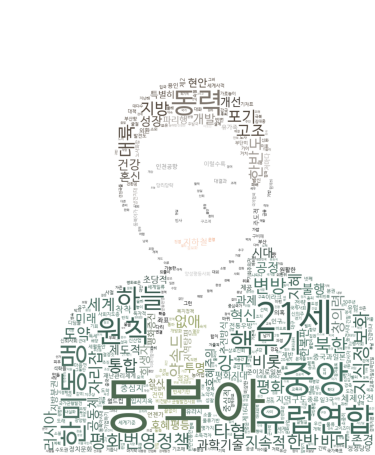

In [20]:

trump_mask = np.array(Image.open("C:/Users/DKU/Desktop/노무현3.png"))
#trump_mask2 = np.array(Image.open("C:/Users/DKU/Desktop/kimdaejung2.jpg"))
top_words = np.sort(np.array(tfidf[corpus[2]],dtype = [('word',int), ('score',float)]),order='score')[::-1]
wc = WordCloud(font_path='C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf',
               background_color="white",
               mask=trump_mask,
               random_state=5,
               max_words=2000,
              width=2000,
              height=2000).fit_words(dict([(dictionary[word],score) 
	for word,score in top_words]))
image_colors = ImageColorGenerator(trump_mask)

plt.figure(num=None, figsize=(60, 60), dpi=10, facecolor='w', edgecolor='k')
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

wc.to_file("노무현_wordcloud.png")